In [1]:
import os

os.chdir('../')
os.getcwd()

'/home/bitwalk/MyProjects/stock-explorer'

In [2]:
dir_path = 'pool'
files = os.listdir(dir_path)
#files

In [3]:
def update_dict(dict_ranking, ticker):
    if ticker in dict_ranking:
        dict_ranking[ticker] += 1
    else:
        dict_ranking[ticker] = 1

In [4]:
def sort_dict_by_value(dic):
    list_key_value = sorted(dic.items(), key=lambda x:x[1], reverse=True)
    dic_new = dict()
    for set0 in list_key_value:
        key = set0[0]
        value = set0[1]
        dic_new[key] = value
    return dic_new

# 三菱ＵＦＪフィナンシャル・グループ (8306)

In [5]:
import re

pattern = re.compile(r'corr_8306-\d+\.pkl')
pkl_8306 = list()
for file in files:
    m = pattern.match(file)
    if m:
        pkl_8306.append(file)
print(pkl_8306)

['corr_8306-1705017600.pkl', 'corr_8306-1705276800.pkl', 'corr_8306-1705363200.pkl', 'corr_8306-1705449600.pkl', 'corr_8306-1705536000.pkl', 'corr_8306-1705622400.pkl', 'corr_8306-1705881600.pkl', 'corr_8306-1705968000.pkl', 'corr_8306-1706054400.pkl', 'corr_8306-1706140800.pkl', 'corr_8306-1706227200.pkl', 'corr_8306-1706486400.pkl', 'corr_8306-1706572800.pkl', 'corr_8306-1706659200.pkl', 'corr_8306-1706745600.pkl', 'corr_8306-1706832000.pkl', 'corr_8306-1707091200.pkl', 'corr_8306-1707177600.pkl', 'corr_8306-1707264000.pkl', 'corr_8306-1707350400.pkl', 'corr_8306-1707436800.pkl', 'corr_8306-1707696000.pkl', 'corr_8306-1707782400.pkl', 'corr_8306-1707868800.pkl', 'corr_8306-1707955200.pkl', 'corr_8306-1708041600.pkl', 'corr_8306-1708300800.pkl', 'corr_8306-1708387200.pkl', 'corr_8306-1708473600.pkl', 'corr_8306-1708560000.pkl', 'corr_8306-1708646400.pkl', 'corr_8306-1708905600.pkl', 'corr_8306-1708992000.pkl', 'corr_8306-1709078400.pkl', 'corr_8306-1709164800.pkl', 'corr_8306-17092512

In [6]:
import pandas as pd

dict_ranking_1_8306 = dict()
dict_ranking_2_8306 = dict()
dict_ranking_3_8306 = dict()

for pkl in pkl_8306:
    file = os.path.join(dir_path, pkl)    
    df_result = pd.read_pickle(file)

    ticker_1 = df_result.index[0]
    update_dict(dict_ranking_1_8306, ticker_1)

    ticker_2 = df_result.index[1]
    update_dict(dict_ranking_2_8306, ticker_2)

    ticker_3 = df_result.index[2]
    update_dict(dict_ranking_3_8306, ticker_3)

dict_ranking_1_8306 = sort_dict_by_value(dict_ranking_1_8306)
dict_ranking_2_8306 = sort_dict_by_value(dict_ranking_2_8306)
dict_ranking_3_8306 = sort_dict_by_value(dict_ranking_3_8306)

print(1, dict_ranking_1_8306)
print(2, dict_ranking_2_8306)
print(3, dict_ranking_3_8306)

1 {'4922': 32, '3186': 15, '6411': 13, '3856': 11, '2590': 7, '6030': 1}
2 {'9058': 22, '6030': 16, '4575': 14, '6548': 7, '3856': 7, '4442': 5, '6411': 4, '5867': 3, '2590': 1}
3 {'4575': 21, '3856': 11, '9058': 10, '6411': 7, '5867': 6, '2998': 5, '8165': 5, '6548': 4, '6030': 4, '6573': 2, '3186': 1, '2999': 1, '4922': 1, '4442': 1}


In [7]:
import datetime

ticker_1 = list(dict_ranking_1_8306.keys())[0]
ticker_2 = list(dict_ranking_1_8306.keys())[1]
ticker_3 = list(dict_ranking_1_8306.keys())[2]

list_ts = list()
list_corr_1 = list()
list_corr_2 = list()
list_corr_3 = list()

pattern = re.compile(r'corr_(\d{4})-(\d+)\.pkl')

#pkl = 'corr_8306-1705017600.pkl'
for pkl in pkl_8306:
    m = pattern.match(pkl)
    if m:
        ticker_target = m.group(1)
        ts = int(m.group(2))
    else:
        ticker_target = ''
        ts = 0
    list_ts.append(str(datetime.datetime.fromtimestamp(ts)))
    
    file = os.path.join(dir_path, pkl)
    df_result = pd.read_pickle(file)
    list_corr_1.append(df_result.loc[ticker_1].iloc[0])
    list_corr_2.append(df_result.loc[ticker_2].iloc[0])
    list_corr_3.append(df_result.loc[ticker_3].iloc[0])

df_corr_8306 = pd.DataFrame({ticker_1: list_corr_1,
                             ticker_2: list_corr_2,
                             ticker_3: list_corr_3,},
                            index=pd.to_datetime(list_ts))
df_corr_8306
df_corr = df_corr_8306

In [8]:
yy = df_corr.index[len(df_corr) - 1].year
mm = df_corr.index[len(df_corr) - 1].month
dd = df_corr.index[len(df_corr) - 1].day
yyyymmdd = '{:0>4}{:0>2}{:0>2}'.format(yy, mm, dd)

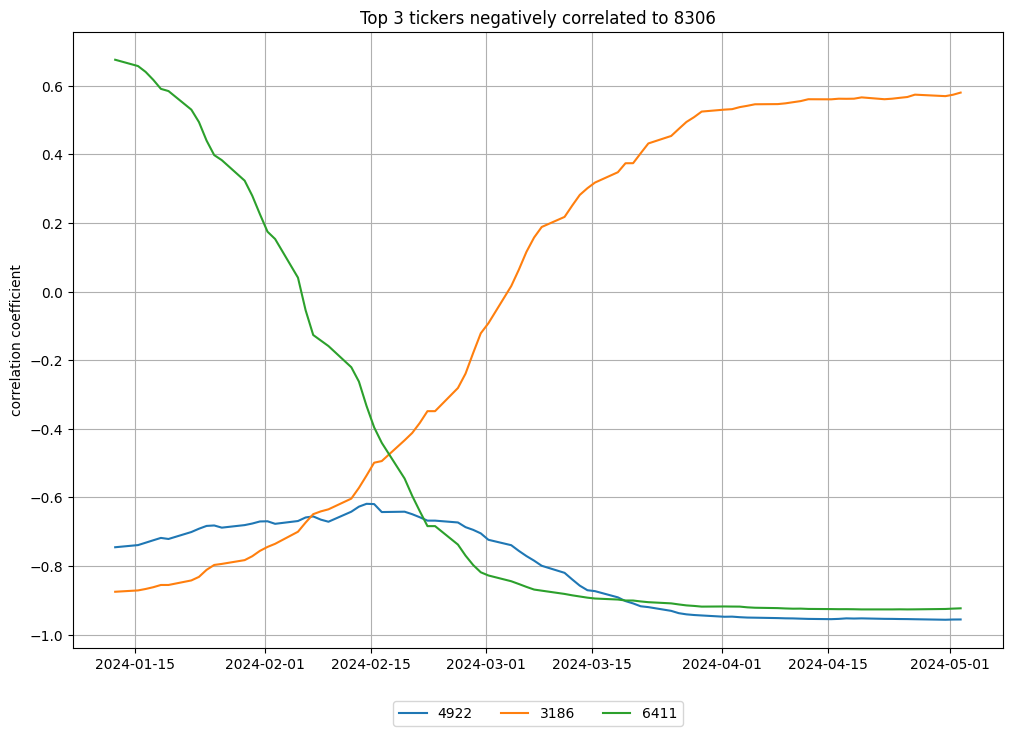

In [9]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 8)

fig, ax = plt.subplots()
ax.set_title('Top 3 tickers negatively correlated to %s' % ticker_target)

ax.plot(df_corr[ticker_1], label=ticker_1)
ax.plot(df_corr[ticker_2], label=ticker_2)
ax.plot(df_corr[ticker_3], label=ticker_3)

#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=3)
plt.ylabel('correlation coefficient')

plt.grid()
plt.savefig('corr_%s_%s.png' % (ticker_target, yyyymmdd))
plt.show()